In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import math

In [2]:
tabela = pd.read_csv('../input/campeonato-braileiro-20092018/tabelas/Tabela_Clubes.csv')

In [3]:
tabela.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN


In [4]:
tabela.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [5]:
tabela.shape

(200, 13)

In [6]:
tabela.dtypes

Ano               int64
Pos.              int64
Clubes           object
Vitorias          int64
Derrotas          int64
Empates           int64
GolsF/S          object
Saldo             int64
Qtd_Jogadores     int64
Idade_Media      object
Estrangeiros      int64
Valor_total       int64
Media_Valor       int64
dtype: object

In [7]:
tabela.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ano,200.0,2.012500e+03,2.879489e+00,2008.0,2010.00,2012.5,2015.00,2017.0
Pos.,200.0,1.050000e+01,5.780751e+00,1.0,5.75,10.5,15.25,20.0
Vitorias,200.0,1.385500e+01,3.967706e+00,4.0,11.00,14.0,16.00,24.0
Derrotas,200.0,1.028000e+01,2.528551e+00,3.0,9.00,10.0,12.00,17.0
Empates,200.0,1.385500e+01,4.187079e+00,4.0,11.00,14.0,17.00,28.0
Saldo,200.0,0.000000e+00,1.552725e+01,-57.0,-9.00,-1.0,11.25,40.0
Qtd_Jogadores,200.0,4.323000e+01,9.476610e+00,20.0,36.00,43.0,50.00,77.0
Estrangeiros,200.0,2.885000e+00,2.042704e+00,0.0,1.00,3.0,4.00,8.0
Valor_total,200.0,3.925280e+07,2.523390e+07,2350000.0,17262500.00,35050000.0,55312500.00,115800000.0
Media_Valor,200.0,9.124400e+05,5.625510e+05,67000.0,392500.00,841000.0,1362500.00,2520000.0


In [8]:
tabela.isnull().sum()

Ano              0
Pos.             0
Clubes           0
Vitorias         0
Derrotas         0
Empates          0
GolsF/S          0
Saldo            0
Qtd_Jogadores    0
Idade_Media      0
Estrangeiros     0
Valor_total      0
Media_Valor      0
dtype: int64

In [9]:
# Algumas colunas estavam com o nome errado, por exemplo a coluna de empates estava como derrota e vice versa. Por isso na linha abaixo estou renomeando as colunas com o nome correto.
tabela.columns = ['Ano', 'Posição', 'Clubes', 'Vitorias', 'Empates', 'Derrotas','GolsF/S', 'Saldo', 'Qtd_Jogadores','Idade_Media', 'Estrangeiros', 'Valor_total', 'Media_Valor']

In [10]:
# O ano dos campeonatos esta errado, por isso vou adicionar 1 aos anos.
tabela['Ano'] = tabela['Ano']+1

In [11]:
tabela.Clubes.value_counts()

Santos           10
Gremio           10
Atletico-MG      10
Fluminense       10
Cruzeiro         10
Sao Paulo        10
Corinthians      10
Flamengo         10
Palmeiras         9
Botafogo          9
Internacional     9
Athletico-PR      9
Coritiba          8
Sport             7
Vasco             7
Vitoria           7
Bahia             6
Avai              5
Figueirense       5
Goias             5
Chapecoense       5
Ponte Preta       5
Atletico-GO       4
Nautico           3
Ceara             3
America-MG        3
Prudente          2
Criciuma          2
Portuguesa        2
Joinville         1
Guarani           1
Santa Cruz        1
Parana            1
Santo Andre       1
Name: Clubes, dtype: int64

In [12]:
#transformando a variável Idade_Media em um float
tabela.Idade_Media = tabela.Idade_Media.apply(lambda x: x.replace(',', '.'))
tabela.Idade_Media = tabela.Idade_Media.astype(float)

In [13]:
# Agora estou criando uma coluna com os pontos dos times
tabela["Pontos"] = (tabela['Vitorias']*3)+(tabela["Empates"])

In [14]:
tabela.head()

,Ano,Posição,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Pontos
0,2018,18,America-MG,10,10,18,30:47,-17,51,24.8,0,27350000,536000,40
1,2018,7,Athletico-PR,16,9,13,54:37,17,52,24.0,3,37650000,724000,57
2,2018,6,Atletico-MG,17,8,13,56:43,13,50,23.4,6,61350000,1230000,59
3,2018,11,Bahia,12,12,14,39:41,-2,48,23.2,2,34900000,727000,48
4,2018,9,Botafogo,13,12,13,38:46,-8,45,23.1,4,25550000,568000,51


# Campeões 

In [15]:
#Um filtro com apenas os campeões.
campeoes = tabela.query('Posição == 1').sort_values('Pontos', ascending=False)

In [16]:
#Para efeito gráfico, vou colocar o ano junto ao nome do Clube.
new_campeao = campeoes["Ano"].copy()
new_campeao = new_campeao.astype(str)
campeoes["Clubes"]= campeoes["Clubes"].str.cat(new_campeao, sep =" - ") 

In [17]:
# Estatística de Pontos dos campeões
campeoes['Pontos'].describe()

count    10.000000
mean     75.500000
std       4.927248
min      67.000000
25%      71.250000
50%      76.500000
75%      80.000000
max      81.000000
Name: Pontos, dtype: float64

Plotando um gráfico em barra da Pontuação dos Campeões.

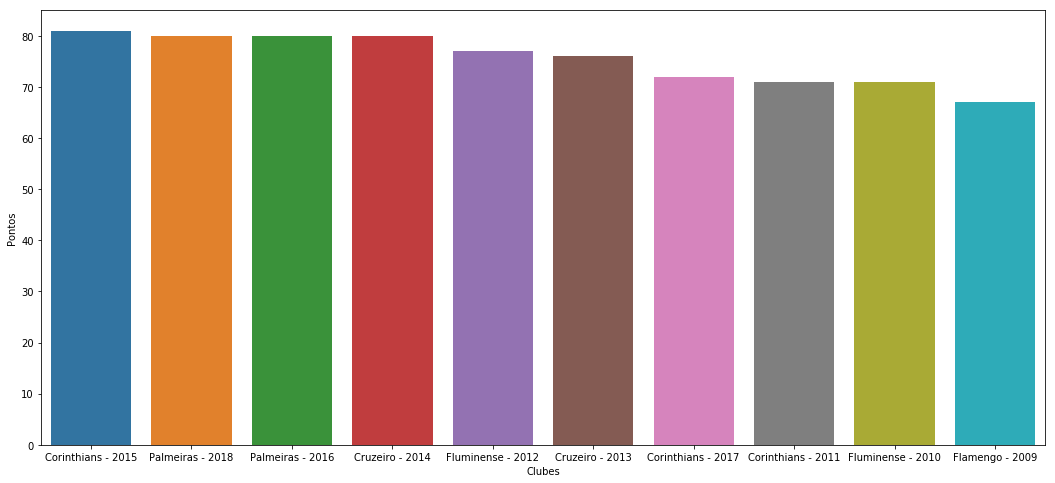

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="Clubes", y="Pontos", data=campeoes)

O Campeão com a maior pontuação foi o Corinthians com 81 pontos em 2015. A Média de pontos dos ultimos campeões foi de cerca de 76 Pontos e o desvio padrão 4,9 que é um valor relativamente baixo.

In [19]:
# Estatística de Vitórias dos campeões
campeoes['Vitorias'].describe()

count    10.000000
mean     22.100000
std       1.791957
min      19.000000
25%      21.000000
50%      22.500000
75%      23.750000
max      24.000000
Name: Vitorias, dtype: float64

Plotando um gráfico em barra das vitórias dos Campeões.

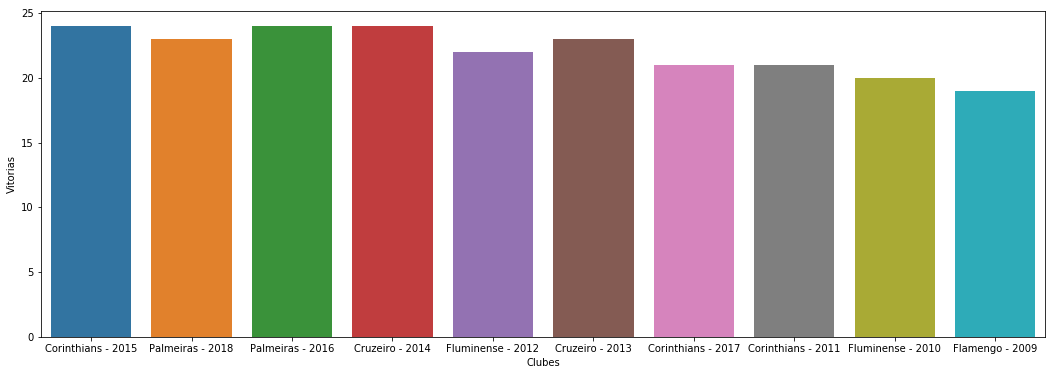

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x="Clubes", y="Vitorias", data=campeoes)

In [21]:
# Estatística de Derrotas dos campeões
campeoes['Derrotas'].describe()

count    10.000000
mean      6.700000
std       1.766981
min       4.000000
25%       5.250000
50%       6.500000
75%       8.000000
max       9.000000
Name: Derrotas, dtype: float64

Plotando um gráfico em barra do número de derrotas dos campeões.

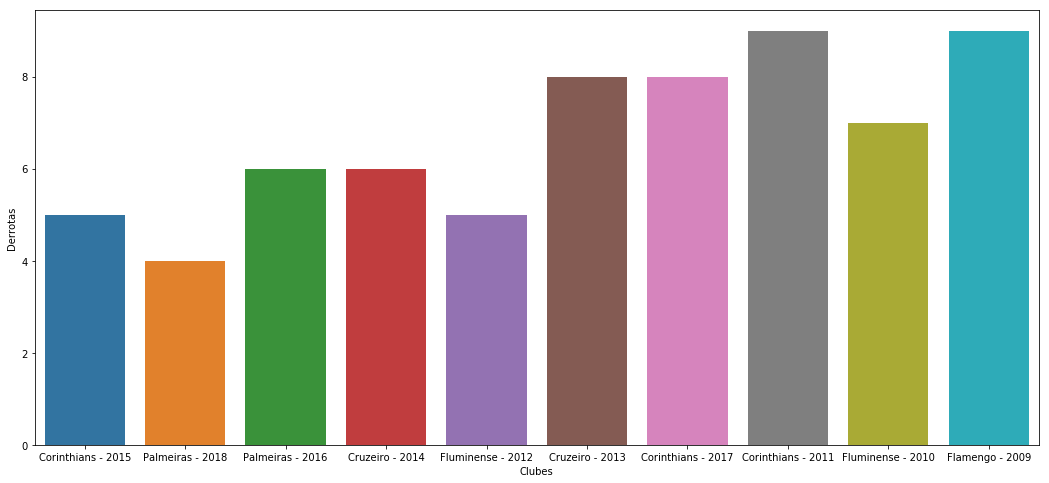

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(x="Clubes", y="Derrotas", data=campeoes)

O Corinthians em 2011 e o Flamengo em 2009 foram os campeões com o maior número de derrotas, sendo 9 no total.

# Vice-Campeões

In [23]:
vice_campeoes = tabela.query('Posição == 2')

In [24]:
vice_campeoes = vice_campeoes.sort_values('Pontos', ascending=False)

In [25]:
#Para efeito gráfico, vou colocar o ano junto ao nome do Clube.
new = vice_campeoes["Ano"].copy()
new = new.astype(str)
vice_campeoes["Clubes"]= vice_campeoes["Clubes"].str.cat(new, sep =" - ") 

In [26]:
# Estatística de pontos dos Vice-campeões
vice_campeoes['Pontos'].describe()

count    10.000000
mean     68.500000
std       3.135815
min      63.000000
25%      66.000000
50%      69.000000
75%      70.750000
max      72.000000
Name: Pontos, dtype: float64

Pontuação máxima de um Vice-Campeão foi de 72 Pontos. A Média de pontuação dos Vice-Campeões foi de 69 Pontos. 

Plotando um gráfico de pontos dos vice-campeões

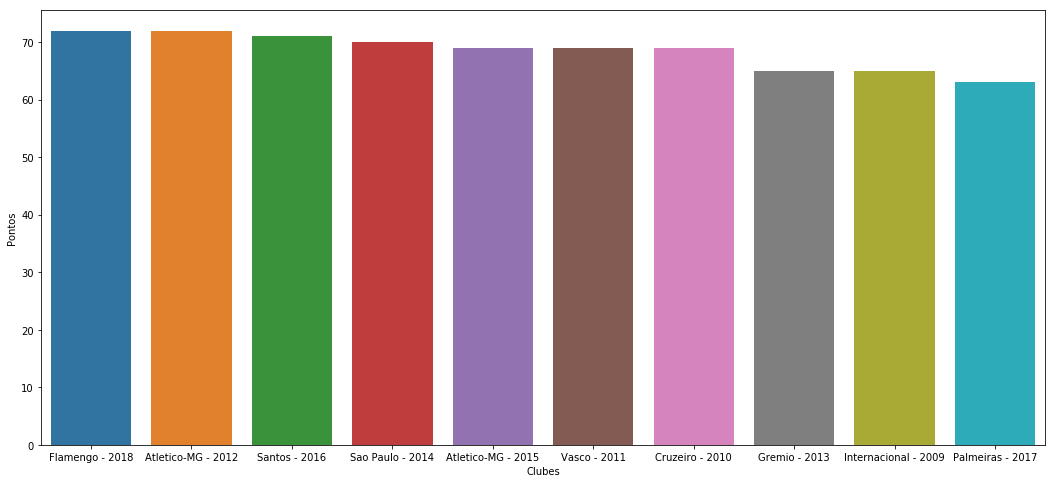

In [27]:
plt.figure(figsize=(18,8))
sns.barplot(x="Clubes", y="Pontos", data=vice_campeoes)

O Vice-Campeão com maior pontuação foi o Flamengo em 2018 com 72 Pontos.

In [28]:
# Estatística de vitórias dos vice_campeões
vice_campeoes['Vitorias'].describe()

count    10.000000
mean     19.900000
std       1.197219
min      18.000000
25%      19.000000
50%      20.000000
75%      20.750000
max      22.000000
Name: Vitorias, dtype: float64

o número maxímo de vitórias de um Vice-Campeão foi 22.

In [29]:
# Estatística de Derrotas dos Vice_campeões
vice_campeoes['Derrotas'].describe()

count    10.000000
mean      9.300000
std       2.162817
min       6.000000
25%       8.000000
50%       9.000000
75%      11.000000
max      13.000000
Name: Derrotas, dtype: float64

Plotando um gráfico de derrotas dos vice-campeões

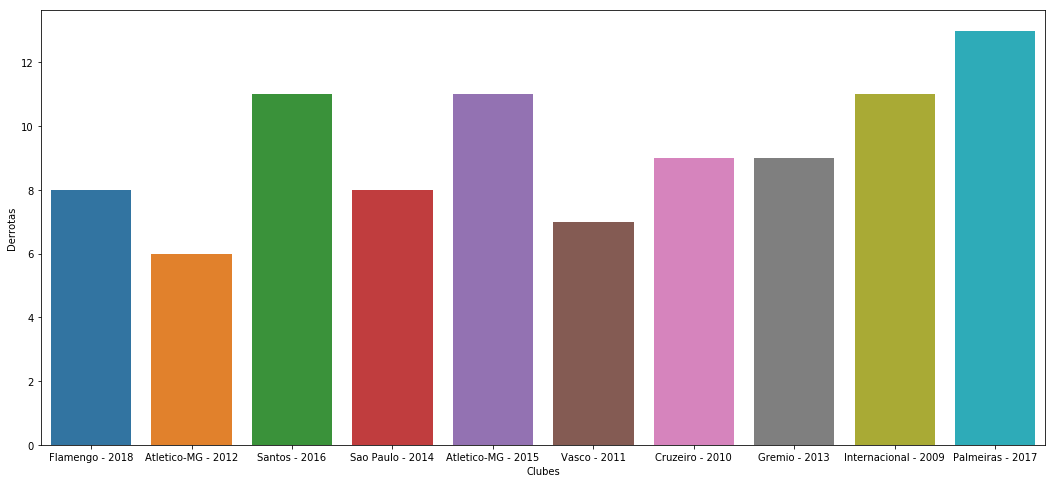

In [30]:
plt.figure(figsize=(18,8))
sns.barplot(x="Clubes", y="Derrotas", data=vice_campeoes)

O Vice-Campeão com menor número de derrotas foi o Atletico-MG em 2012 com 6 derrotas.

<p>Algumas condições:<p/>
Ter pelo menos 75 Pontos.<br /> 
Alcançar 23 vitórias.<br />
Perder no máximo 5 vezes.<br />

# Libertadores da América 

In [31]:
libertadores = tabela.query('Posição == 4').sort_values('Pontos', ascending=False)

In [32]:
#Para efeito gráfico, vou colocar o ano junto ao nome do Clube.
new_liberta = libertadores["Ano"].copy()
new_liberta = new_liberta.astype(str)
libertadores["Clubes"]= libertadores["Clubes"].str.cat(new_liberta, sep =" - ") 

In [33]:
# Estatística de pontos Libertadores
libertadores['Pontos'].describe()

count    10.000000
mean     63.400000
std       2.674987
min      61.000000
25%      62.000000
50%      62.000000
75%      65.250000
max      69.000000
Name: Pontos, dtype: float64

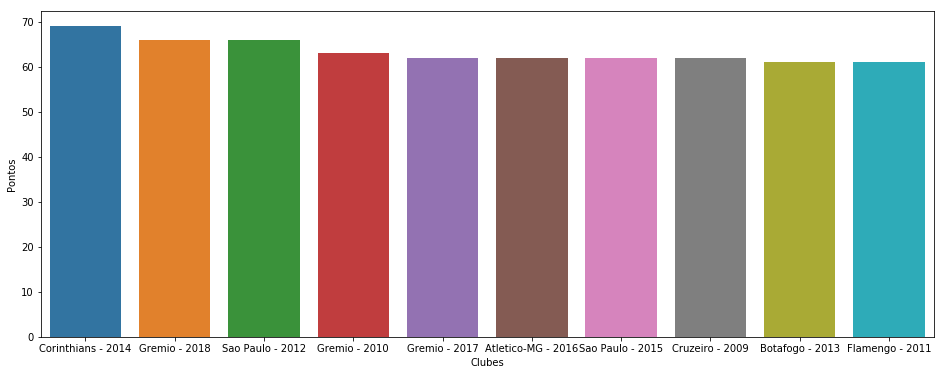

In [34]:
plt.figure(figsize=(16,6))
sns.barplot(x="Clubes", y="Pontos", data=libertadores)

A Média de pontos para ir a libertadores direto (chegar entre os 4 primeiros sem ter que ir a pré-libertadores) é de cerca de 63 Pontos. O Desvio padrão é de cerca de 2,6. Porém em 2018 o São Paulo chegou em quinto lugar com 63 pontos, o que me fez dúvidar deste número, então decidi vericar o número de vitórias.


# Pré-Libertadores

In [35]:
pre_libertadores = tabela.query('Posição in [5,6]').sort_values('Pontos', ascending=False)

In [36]:
pre_libertadores['Pontos'].describe()

count    20.000000
mean     59.150000
std       1.871532
min      56.000000
25%      57.750000
50%      59.000000
75%      60.000000
max      63.000000
Name: Pontos, dtype: float64

<p>Agora quero saber se é possível fazer previsões com variavéis de antes de iniciar o campeonato, como:<p/>

Qtd_Jogadores.<br /> Idade_Media.<br /> Estrangeiros.<br /> Valor_total.<br /> 	Media_Valor.<br />

In [37]:
X = tabela.drop(['Ano', 'Posição', 'Clubes', 'Vitorias', 'Derrotas', 'Empates', 'GolsF/S', 'Saldo', 'Pontos'], axis=1)
y= tabela['Posição']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [39]:
modelo_regressao = LinearRegression()

In [40]:
modelo_arvore= DecisionTreeClassifier()

In [41]:
modelo_svc = SVC()

In [42]:
modelo_regressao.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
modelo_arvore.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
modelo_svc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
predict_regressao = modelo_regressao.predict(X_test)

In [46]:
predict_arvore = modelo_arvore.predict(X_test)

In [47]:
predict_svc= modelo_svc.predict(X_test)

In [48]:
regressao = r2_score(y_test,predict_regressao)*100
regressao = round(regressao, 2)

In [49]:
decision_tree = accuracy_score(y_test,predict_arvore)*100
decision_tree = round(decision_tree, 2)

In [50]:
svc = accuracy_score(y_test,predict_svc)*100
svc = round(svc, 2)

In [51]:
print('Usando regressão linear as minhas previsões acertaram', regressao, '%')
print('Usando arvore de decisão as minhas previsões acertaram', decision_tree, '%')
print('Usando SVC as minhas previsões acertaram', svc, '%')

Usando regressão linear as minhas previsões acertaram 6.55 %
Usando arvore de decisão as minhas previsões acertaram 0.0 %
Usando SVC as minhas previsões acertaram 0.0 %


Os meus acertos não foram grandes para que eu possa definir quem será o campeão apenas com essas variáveis.